In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#df=pd.read_csv("./data/drugsCom.tsv",delimiter='\t')
df=pd.read_csv("./data/winequality-red.csv",delimiter=";")

In [3]:
df.shape

(1599, 12)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#select variable
import seaborn as sns
# Create the default pairplot
#sns.pairplot(df)

#here i choose fixed acidity and chlorides to define pH

In [6]:
for col in df.columns: 
    print(col) 

df.columns = df.columns.str.replace(' ', '_')
for col in df.columns: 
    print(col) 

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
fixed_acidity
volatile_acidity
citric_acid
residual_sugar
chlorides
free_sulfur_dioxide
total_sulfur_dioxide
density
pH
sulphates
alcohol
quality


## Part 1:  Review of regularized regression

In [7]:
y=df.pH.values
x=df.fixed_acidity.values

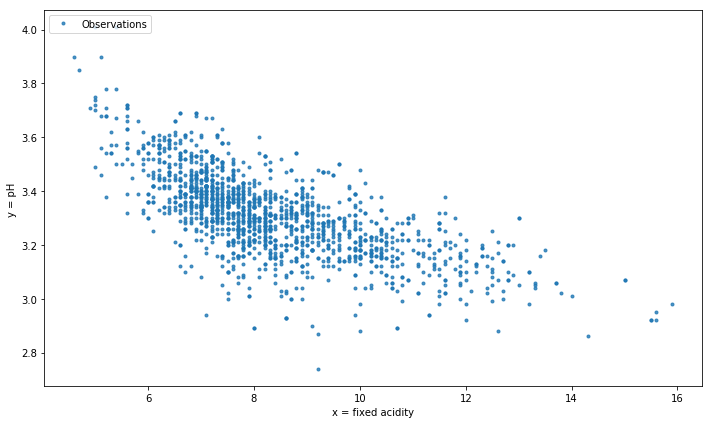

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y,'.', alpha=0.8, label='Observations')

plt.legend(loc='upper left')
plt.xlabel("x = fixed acidity")
plt.ylabel("y = pH ")
#plt.show()
plt.tight_layout()

In [9]:
#here we choose 30% of the random sample index
select_size=round(x.shape[0]*0.3)
indexes=np.sort(np.random.choice(x.shape[0],size=select_size,replace=False))
print(indexes.shape)
#print(indexes)

(480,)


In [10]:
#create a new dataframe from the random points
sample_df=pd.DataFrame(dict(x=x[indexes],y=y[indexes]))
sample_df.head()

,x,y
0,7.8,3.20
1,7.4,3.51
2,6.7,3.28
3,8.9,3.16
4,8.5,3.30


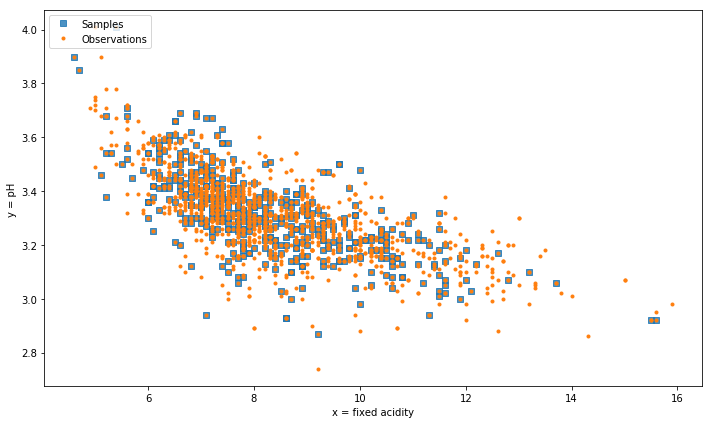

In [11]:
#now we look again the sample dataset

plt.figure(figsize=(10, 6))
plt.plot(sample_df['x'], sample_df['y'], 's', alpha=0.8, label='Samples')
plt.plot(x, y,'.', label='Observations')

plt.legend(loc='upper left')

plt.xlabel("x = fixed acidity")
plt.ylabel("y = pH ")
plt.tight_layout()

In [12]:
#now we split the dataset (80% training dataset)
from sklearn.model_selection import train_test_split

itrain, itest=train_test_split(np.arange(select_size), train_size=.8)

#itrain[range(10)]
xtrain=sample_df.x[itrain].values
ytrain=sample_df.y[itrain].values

xtest=sample_df.x[itest].values
ytest=sample_df.y[itest].values


C:\Users\720S\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Part 3: Ridge regression for Simple Linear Regression

In [13]:
#part 3: Ridge regression for simple linear regression
regression_coeffs=dict()

regression_coeffs['OLS'] = [np.nan]*2 # Initialize to NaN
regression_coeffs[r'Ridge $\lambda = 0$'] = [np.nan]*2

dfResults=pd.DataFrame(regression_coeffs)
dfResults.rename({0: r'$\beta_{0}$', 1: r'$\beta_{1}$'}, inplace=True) # Rename rows
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,NaN,NaN
$\beta_{1}$,NaN,NaN


In [14]:
#now we do linear regression

from sklearn.linear_model import LinearRegression
simp_reg=LinearRegression().fit(xtrain.reshape(-1,1),ytrain)

In [15]:
beta0_sreg=simp_reg.intercept_
beta1_sreg=simp_reg.coef_[0]

print("(beta0, beta1) = ({0:8.6f}, {1:8.6f})".format(beta0_sreg, beta1_sreg))

(beta0, beta1) = (3.861028, -0.066050)


In [16]:
#OLS: orinary least square
dfResults['OLS'][:]=[beta0_sreg,beta1_sreg]
dfResults

,OLS,Ridge $\lambda = 0$
$\beta_{0}$,3.861028,NaN
$\beta_{1}$,-0.066050,NaN


In [17]:
#y_predict = lambda x : beta0_sreg + beta1_sreg*x # make predictions
ypredict_ols = simp_reg.predict(x.reshape(-1,1))
ypredict_ols.shape

(1599,)

In [18]:
from sklearn.linear_model import Ridge 

In [57]:
ridge_reg = Ridge(alpha = 0)
ridge_reg.fit(xtrain.reshape(-1,1), ytrain)

# save the beta coefficients
beta0_ridge = ridge_reg.intercept_
beta1_ridge = ridge_reg.coef_[0]

ypredict_ridge = ridge_reg.predict(x.reshape(-1,1)) # make predictions everywhere

dfResults[r'Ridge $\lambda = 0$'][:] = [beta0_ridge, beta1_ridge]
dfResults


,OLS,Ridge $\lambda = 0$
$\beta_{0}$,3.861028,3.861028
$\beta_{1}$,-0.066050,-0.066050


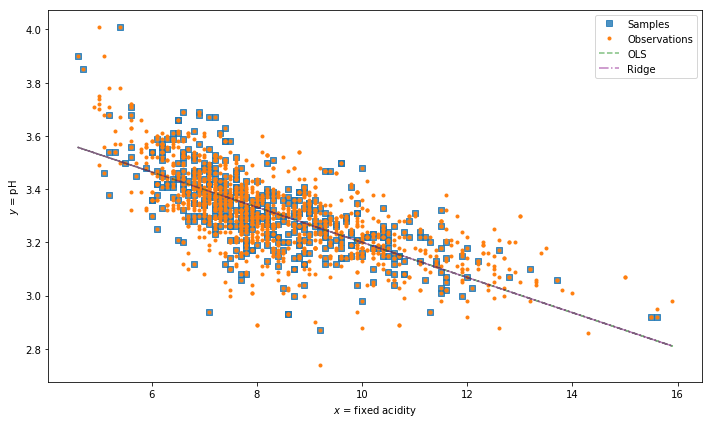

In [58]:
plt.figure(figsize=(10, 6))


plt.plot(sample_df['x'], sample_df['y'], 's', alpha=0.8, label='Samples')
plt.plot(x, y,'.', label='Observations')
plt.plot(x,ypredict_ols,ls='--',label="OLS",alpha=0.5,color='green')
plt.plot(x,ypredict_ridge,ls='-.',alpha=0.5,label="Ridge",color='purple')

plt.legend(loc='upper right')

plt.xlabel("$x$ = fixed acidity")
plt.ylabel("$y$ = pH ")
plt.tight_layout()

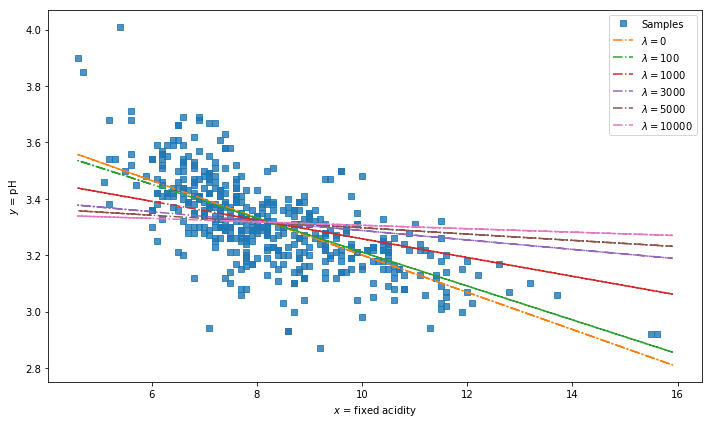

In [21]:
#now we explore the effect of $\lambda$ on ridge regression
plt.figure(figsize=(10, 6))

pen_params = [0,100,1000,3000,5000,10000]

#plt.plot(x, y,'.', label='Observations')
plt.plot(sample_df['x'], sample_df['y'], 's', alpha=0.8, label='Samples')

for alpha in pen_params:
    ridge_reg=Ridge(alpha=alpha)
    ridge_reg.fit(xtrain.reshape(-1,1),ytrain)
    ypredict_ridge=ridge_reg.predict(x.reshape(-1,1))
    plt.plot(x,ypredict_ridge,'-.',label=r"$\lambda={}$".format(alpha))
    
plt.legend(loc='upper right')

plt.xlabel("$x$ = fixed acidity")
plt.ylabel("$y$ = pH ")
plt.tight_layout()

## Part 5 cross-validation -- finding the best penalization parameter

In [22]:
from sklearn.model_selection import GridSearchCV

In [47]:
def cv_optimize_ridge(x: np.ndarray, y: np.ndarray, list_of_lambdas: list, n_folds: int =4):
    est = Ridge()
    parameters = {'alpha': list_of_lambdas}
    gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, scoring="neg_mean_squared_error")
    gs.fit(x, y)
    return gs

#param_grid : dict or list of dictionaries

In [48]:
#lambs=[0,100,500,1000,3000,5000,7500,10000]
lambs = [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0,3,5, 10.0,20.0,50.0]
fitmodel=cv_optimize_ridge(xtrain.reshape(-1,1), ytrain,lambs,n_folds=4)

In [49]:
print(fitmodel.best_estimator_, "\n")
print(fitmodel.best_params_, "\n")
print(fitmodel.best_score_, "\n")

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 

{'alpha': 10.0} 

-0.0140086720082861 



In [50]:
fit_lambdas = [d['alpha'] for d in fitmodel.cv_results_['params']]
fit_scores = fitmodel.cv_results_['mean_test_score']

Now we make a `log-log` plot of `-fit_scores` versus `fit_lambdas`. we can see that 10 is the best value for lambda

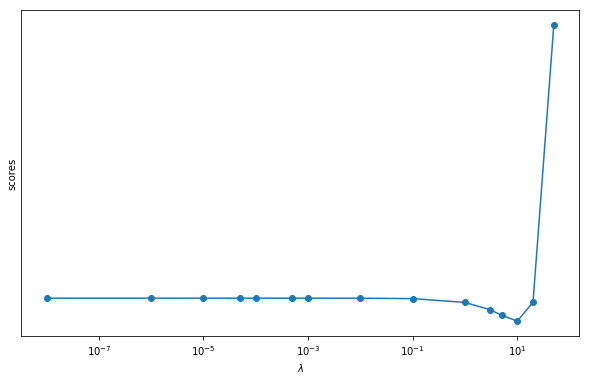

In [55]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(fit_lambdas, -fit_scores, ls='-', marker='o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('scores');

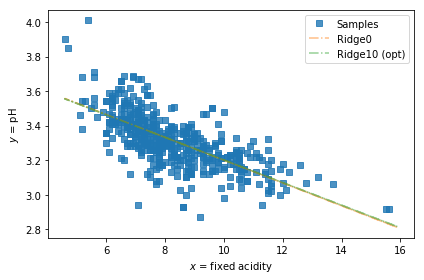

In [64]:
#with the optimal lambda we can try again the ridge regression

ridge_reg_opt = Ridge(alpha = 10)
ridge_reg_opt.fit(xtrain.reshape(-1,1), ytrain)
ypredict_ridge_opt = ridge_reg_opt.predict(x.reshape(-1,1))

plt.plot(sample_df['x'], sample_df['y'], 's', alpha=0.8, label='Samples')
#plt.plot(x, y,'.', label='Observations')
plt.plot(x,ypredict_ridge,ls='-.',alpha=0.5,label="Ridge0")
plt.plot(x,ypredict_ridge_opt,ls='-.',alpha=0.5,label="Ridge10 (opt)")

plt.legend(loc='upper right')

plt.xlabel("$x$ = fixed acidity")
plt.ylabel("$y$ = pH ")
plt.tight_layout()

### SK-learn's `cross_val_score`: Easier Cross Validation
`GridSearchCV` is an important tool when you are searching over many hyperparameters (and believe us, you will be), but when you only need to get CV scores for a particular model, some students find `cross_val_score` more intuitive.

In [79]:
from sklearn.model_selection import cross_val_score

lr_object =  Ridge(alpha=0)
cross_val_score(lr_object, xtrain.reshape(-1,1), ytrain, cv=5)

array([0.47431918, 0.32093271, 0.35465057, 0.6237389 , 0.45773004])

In [84]:
for a in lambs:
    Ir_object=Ridge(alpha=a)
    scores=cross_val_score(lr_object, xtrain.reshape(-1,1), ytrain, cv=5)
    print("lambda {}\t R^2 scores: {}\t Mean R^2: {}".format(a,scores,np.mean(scores)))

lambda 1e-08	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 1e-06	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 1e-05	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 5e-05	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 0.0001	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 0.0005	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 0.001	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 0.01	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4462742781715262
lambda 0.1	 R^2 scores: [0.47431918 0.32093271 0.35465057 0.6237389  0.45773004]	 Mean R^2: 0.4

### Built-in Cross Validation: `RidgeCV` and `LassoCV`
Some sklearn models have built-in, automated cross validation to tune their hyper parameters. 

In [85]:
from sklearn.linear_model import RidgeCV

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0), cv=5)
ridgeCV_object.fit(xtrain.reshape(-1,1), ytrain)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 10.0
intercept = 3.8557126604209646
betas = [-0.06540485], 


### Important note: 

1. For any tool more automated than literally using k_fold, just setting `cv=5` will **NOT** shuffle your data by default.  This can be a problem with time-series data!
2. To force shuffling, explicitly pass a `KFold` object (with shuffling turned on) to the cv argument
3. You may prefer a strategy where you shuffle the rows of your data at the outset of analysis

In [87]:
from sklearn.model_selection import KFold
splitter = KFold(5, random_state=42, shuffle=True)

ridgeCV_object = RidgeCV(alphas=(1e-8, 1e-4, 1e-2, 1.0, 10.0), cv=splitter)
ridgeCV_object.fit(xtrain.reshape(-1,1), ytrain)
print("Best model searched:\nalpha = {}\nintercept = {}\nbetas = {}, ".format(ridgeCV_object.alpha_,
                                                                            ridgeCV_object.intercept_,
                                                                            ridgeCV_object.coef_
                                                                            )
     )

Best model searched:
alpha = 10.0
intercept = 3.8557126604209646
betas = [-0.06540485], 


C:\Users\720S\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
